In [1]:
%pylab
%matplotlib inline
import pandas as pd
import sklearn
from sklearn import datasets
data = datasets.load_iris()

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# jeu de donnees autos
autos = pd.read_csv('autos.txt', delimiter='\t')
numericAutos = autos[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

# Méthodes de segmentation
## Algorithme des k-moyennes

* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#k-means

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
X = numericAutos.as_matrix()
scaledX = scale(X)
K = 3
kmeans = KMeans(n_clusters=K).fit(scaledX)
centroids = []
for i in range(3):
    c = X[kmeans.labels_==i].mean(0)
    print('centre du groupe {} ({} observations): {}'.format(i, sum(kmeans.labels_==i), c))

centre du groupe 0 (83 observations): [  9.80469880e+01   1.76178313e+02   6.60301205e+01   5.30783133e+01
   2.62908434e+03   1.32578313e+02   3.43072289e+00   3.26734940e+00
   8.73987952e+00   1.18994217e+02   5.14157518e+03   2.20240964e+01
   2.79156627e+01   1.36236281e+04]
centre du groupe 1 (82 observations): [  9.48804878e+01   1.63358537e+02   6.41609756e+01   5.33951220e+01
   2.10131707e+03   9.75975610e+01   3.11000000e+00   3.22695122e+00
   1.07647561e+01   7.27682927e+01   5.20609756e+03   3.12439024e+01
   3.70000000e+01   7.82857634e+03]
centre du groupe 2 (40 observations): [  1.08175000e+02   1.91547500e+02   6.92350000e+01   5.57425000e+01
   3.33422500e+03   1.75225000e+02   3.57075000e+00   3.28950000e+00
   1.17775000e+01   1.38225000e+02   4.92625000e+03   1.95000000e+01
   2.38250000e+01   2.33689283e+04]


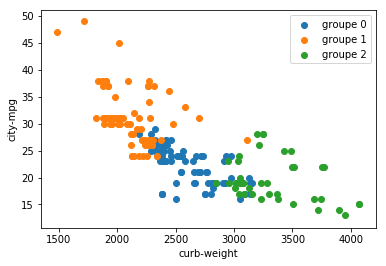

In [5]:
def plotClusters(K, labels, data, xname, yname):
    figure()
    for i in range(K):
        scatter(data.loc[labels==i, xname], data.loc[labels==i, yname], 
                label = 'groupe {}'.format(i))
    legend()
    xlabel(xname)
    ylabel(yname)
plotClusters(K, kmeans.labels_, autos, 'curb-weight', 'city-mpg')

## Méthodes de classification hiérarchique ascendante
* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

centre du groupe 0 (28 observations): [  1.04885714e+02   1.87525000e+02   6.90785714e+01   5.40178571e+01
   3.40732143e+03   2.02321429e+02   3.62142857e+00   3.37357143e+00
   1.32892857e+01   1.60107143e+02   4.88214286e+03   1.92857143e+01
   2.37857143e+01   2.77675761e+04]
centre du groupe 1 (120 observations): [  9.92600000e+01   1.76493333e+02   6.59991667e+01   5.40016667e+01
   2.60502500e+03   1.24416667e+02   3.38650000e+00   3.23966667e+00
   8.70175000e+00   1.08921000e+02   5.17875617e+03   2.27750000e+01
   2.83750000e+01   1.24663511e+04]
centre du groupe 2 (57 observations): [  9.46859649e+01   1.62284211e+02   6.41578947e+01   5.29982456e+01
   2.03303509e+03   9.51052632e+01   3.06701754e+00   3.23087719e+00
   1.16300000e+01   6.70000000e+01   5.13245614e+03   3.32807018e+01
   3.91754386e+01   7.61416246e+03]


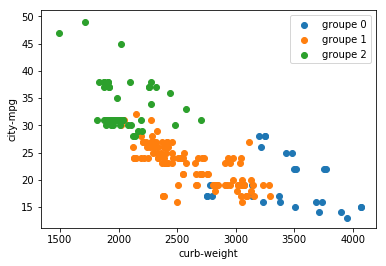

In [6]:
from sklearn.cluster import AgglomerativeClustering
K = 3
hac = AgglomerativeClustering(n_clusters=K, linkage = "complete").fit(scaledX)
centroids = []
for i in range(3):
    c = X[hac.labels_==i].mean(0)
    print('centre du groupe {} ({} observations): {}'.format(i, sum(hac.labels_==i), c))
plotClusters(K, hac.labels_, autos, 'curb-weight', 'city-mpg')